## Decision Tree Classifier Pre Pruning and Hyper parameter tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [5]:
dataset=load_breast_cancer()

In [6]:
df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [7]:
## splitting into independent and Dependent Features

In [8]:
X=df
y=dataset.target

In [9]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)

In [15]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train,y_train)
y_pred=treeclassifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [16]:
parameter={
'criterion':['gini','entropy','log_loss'],
    'splitter':['random','best'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [19]:
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
## train the data
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [25]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [26]:
y_pred=clf.predict(X_test)

In [27]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred,y_test))

0.9298245614035088


In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        52
           1       0.97      0.93      0.95       119

    accuracy                           0.93       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



In [38]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier1=DecisionTreeClassifier(criterion='log_loss',
                                         max_depth=6,
                                         max_features='auto',
                                         splitter='best')

In [39]:
treeclassifier1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features='auto')

In [40]:
y_pred=treeclassifier1.predict(X_test)

In [41]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

[Text(0.5357142857142857, 0.9285714285714286, 'x[7] <= 0.049\nlog_loss = 0.966\nsamples = 398\nvalue = [156, 242]'),
 Text(0.30952380952380953, 0.7857142857142857, 'x[13] <= 38.415\nlog_loss = 0.341\nsamples = 236\nvalue = [15, 221]'),
 Text(0.19047619047619047, 0.6428571428571429, 'x[2] <= 96.855\nlog_loss = 0.201\nsamples = 224\nvalue = [7, 217]'),
 Text(0.09523809523809523, 0.5, 'x[20] <= 15.89\nlog_loss = 0.076\nsamples = 214\nvalue = [2, 212]'),
 Text(0.047619047619047616, 0.35714285714285715, 'log_loss = 0.0\nsamples = 196\nvalue = [0, 196]'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[20] <= 15.955\nlog_loss = 0.503\nsamples = 18\nvalue = [2, 16]'),
 Text(0.09523809523809523, 0.21428571428571427, 'log_loss = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.19047619047619047, 0.21428571428571427, 'x[28] <= 0.333\nlog_loss = 0.323\nsamples = 17\nvalue = [1, 16]'),
 Text(0.14285714285714285, 0.07142857142857142, 'log_loss = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.238095238

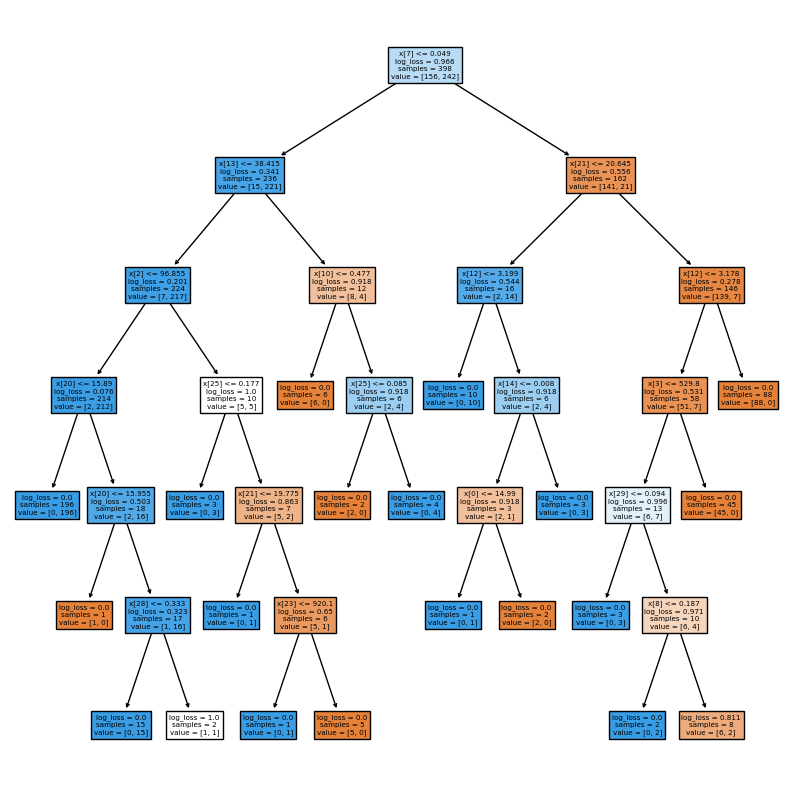

In [42]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(treeclassifier1,filled=True)